In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df = pd.read_csv("AI_ML_Intern_Task_Data.csv")
df.head()

,user_id,car_type,service_type,booking_day_of_week,booking_hour,lead_time_days,previous_missed_appointments,no_show,payment_method,first_time_user,...,distance_to_station_km,preferred_time_slot,device_used,referral_source,booking_channel,service_duration_minutes,rating_previous_service,wait_time_last_booking_min,account_age_days,cancellation_count
0,user_0,sedan,brake_repair,Tuesday,13.0,14.0,1.0,1,cash,0,...,0.56,morning,tablet,friend,whatsapp,90.0,NaN,1.0,743.0,0.0
1,user_1,suv,oil_change,Sunday,7.0,25.0,0.0,0,card,yes,...,9.40,morning,NaN,instagram,mobile_app,NaN,3.8,13.0,NaN,1.0
2,user_2,truck,oil_change,Saturday,14.0,NaN,3.0,0,transfer,yes,...,NaN,morning,mobile,NaN,web,45.0,4.6,15.0,490.0,1.0
3,user_3,sedan,oil_change,Friday,18.0,22.0,4.0,0,NaN,0,...,28.13,morning,NaN,NaN,web,44.0,1.9,2.0,723.0,5.0
4,user_4,truck,brake_repair,Tuesday,14.0,20.0,5.0,0,transfer,0,...,8.94,afternoon,tablet,google,NaN,66.0,3.0,60.0,320.0,NaN


In [59]:
df.shape

(1200, 21)

In [60]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       1200 non-null   object 
 1   car_type                      1066 non-null   object 
 2   service_type                  1073 non-null   object 
 3   booking_day_of_week           1093 non-null   object 
 4   booking_hour                  1096 non-null   object 
 5   lead_time_days                1078 non-null   float64
 6   previous_missed_appointments  1080 non-null   float64
 7   no_show                       1200 non-null   int64  
 8   payment_method                1083 non-null   object 
 9   first_time_user               1065 non-null   object 
 10  discount_applied              813 non-null    object 
 11  distance_to_station_km        1049 non-null   float64
 12  preferred_time_slot           1089 non-null   object 
 13  dev

,lead_time_days,previous_missed_appointments,no_show,distance_to_station_km,service_duration_minutes,rating_previous_service,wait_time_last_booking_min,account_age_days,cancellation_count
count,1078.000000,1080.000000,1200.000000,1049.000000,1074.000000,960.000000,1079.000000,1058.000000,1075.000000
mean,13.567718,2.512037,0.500000,15.535539,74.077281,3.011979,30.123262,493.415879,2.486512
std,11.229213,1.712367,0.500208,8.571965,26.077499,1.146647,17.427736,288.798747,1.700190
min,-30.000000,0.000000,0.000000,0.520000,30.000000,1.000000,0.000000,1.000000,0.000000
25%,6.000000,1.000000,0.000000,8.240000,51.000000,2.000000,15.500000,239.000000,1.000000
50%,14.000000,2.000000,0.500000,15.710000,74.000000,3.000000,30.000000,481.500000,2.000000
75%,22.000000,4.000000,1.000000,23.150000,96.000000,4.000000,45.000000,747.000000,4.000000
max,30.000000,5.000000,1.000000,30.000000,120.000000,5.000000,60.000000,1000.000000,5.000000


In [61]:
df.columns

Index(['user_id', 'car_type', 'service_type', 'booking_day_of_week',
       'booking_hour', 'lead_time_days', 'previous_missed_appointments',
       'no_show', 'payment_method', 'first_time_user', 'discount_applied',
       'distance_to_station_km', 'preferred_time_slot', 'device_used',
       'referral_source', 'booking_channel', 'service_duration_minutes',
       'rating_previous_service', 'wait_time_last_booking_min',
       'account_age_days', 'cancellation_count'],
      dtype='object')

In [62]:
df.dtypes

user_id                          object
car_type                         object
service_type                     object
booking_day_of_week              object
booking_hour                     object
lead_time_days                  float64
previous_missed_appointments    float64
no_show                           int64
payment_method                   object
first_time_user                  object
discount_applied                 object
distance_to_station_km          float64
preferred_time_slot              object
device_used                      object
referral_source                  object
booking_channel                  object
service_duration_minutes        float64
rating_previous_service         float64
wait_time_last_booking_min      float64
account_age_days                float64
cancellation_count              float64
dtype: object

In [63]:
df.isna().sum()

user_id                           0
car_type                        134
service_type                    127
booking_day_of_week             107
booking_hour                    104
lead_time_days                  122
previous_missed_appointments    120
no_show                           0
payment_method                  117
first_time_user                 135
discount_applied                387
distance_to_station_km          151
preferred_time_slot             111
device_used                     126
referral_source                 311
booking_channel                 113
service_duration_minutes        126
rating_previous_service         240
wait_time_last_booking_min      121
account_age_days                142
cancellation_count              125
dtype: int64

In [64]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Numerical columns :", numerical_cols)

Numerical columns : ['lead_time_days', 'previous_missed_appointments', 'no_show', 'distance_to_station_km', 'service_duration_minutes', 'rating_previous_service', 'wait_time_last_booking_min', 'account_age_days', 'cancellation_count']


In [65]:
categorical_cols = [col for col in df if col not in numerical_cols]
print("category columns:", categorical_cols)

category columns: ['user_id', 'car_type', 'service_type', 'booking_day_of_week', 'booking_hour', 'payment_method', 'first_time_user', 'discount_applied', 'preferred_time_slot', 'device_used', 'referral_source', 'booking_channel']


In [66]:
df.booking_hour.value_counts()

14.0       78
19.0       78
7.0        76
20.0       75
13.0       74
9.0        72
18.0       69
8.0        69
6.0        69
10.0       67
15.0       67
11.0       67
12.0       64
invalid    60
16.0       59
17.0       52
Name: booking_hour, dtype: int64

In [67]:
df['booking_hour'] = pd.to_numeric(df['booking_hour'], errors='coerce')
df['booking_hour'] = df['booking_hour'].apply(lambda x: np.nan if x < 0 else x)

In [68]:
numerical_imputer = SimpleImputer(strategy='median')
df['booking_hour'] = numerical_imputer.fit_transform(df[['booking_hour']])
df['booking_hour'] = df['booking_hour'].astype(float)

In [69]:
numerical_cols = ['booking_hour', 'lead_time_days', 'previous_missed_appointments', 'service_duration_minutes',
            'rating_previous_service', 'wait_time_last_booking_min', 'account_age_days', 'cancellation_count','distance_to_station_km']
numerical_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

In [70]:
cat_cols = ['car_type', 'service_type', 'booking_day_of_week', 'payment_method', 'device_used',
            'referral_source', 'booking_channel', 'preferred_time_slot', 'discount_applied']
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [71]:
df.isna().sum()

user_id                           0
car_type                          0
service_type                      0
booking_day_of_week               0
booking_hour                      0
lead_time_days                    0
previous_missed_appointments      0
no_show                           0
payment_method                    0
first_time_user                 135
discount_applied                  0
distance_to_station_km            0
preferred_time_slot               0
device_used                       0
referral_source                   0
booking_channel                   0
service_duration_minutes          0
rating_previous_service           0
wait_time_last_booking_min        0
account_age_days                  0
cancellation_count                0
dtype: int64

In [72]:
df['first_time_user'] = df['first_time_user'].map({'yes': 1, 'no': 0, '': 0}).fillna(0)
df['first_time_user'] = df['first_time_user'].astype(int)

In [73]:
df = df.drop('user_id', axis=1)


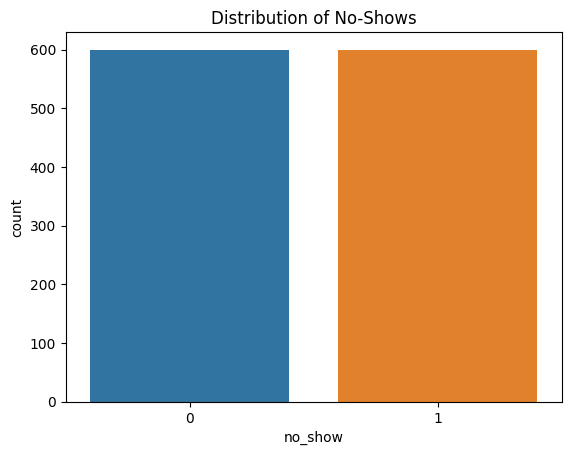

In [74]:
sns.countplot(x='no_show', data=df)
plt.title('Distribution of No-Shows')
plt.show()


Correlation Matrix:
                              booking_hour  lead_time_days  \
booking_hour                      1.000000        0.005317   
lead_time_days                    0.005317        1.000000   
previous_missed_appointments     -0.010857        0.034278   
service_duration_minutes         -0.018037        0.009606   
rating_previous_service           0.008385       -0.007033   
wait_time_last_booking_min        0.024514        0.028241   
account_age_days                 -0.020266        0.010919   
cancellation_count               -0.034546       -0.035151   
distance_to_station_km            0.019934        0.052298   

                              previous_missed_appointments  \
booking_hour                                     -0.010857   
lead_time_days                                    0.034278   
previous_missed_appointments                      1.000000   
service_duration_minutes                          0.003351   
rating_previous_service                          

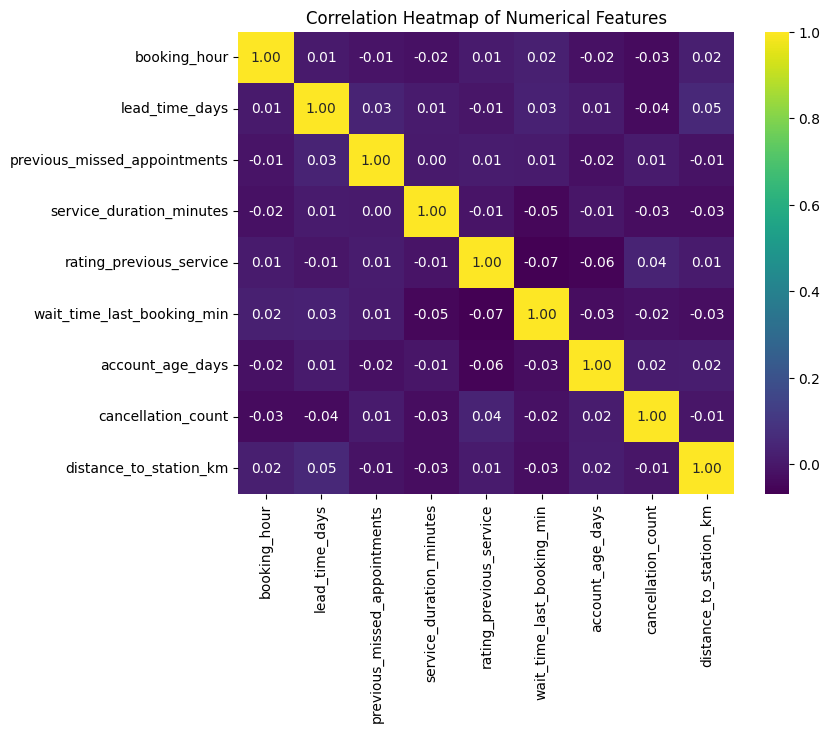

In [75]:
df_numerical=df[numerical_cols]
correlation_matrix = df_numerical.corr()

print("Correlation Matrix:")
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,
            annot=True,    
            cmap='viridis',
            fmt=".2f")  

plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [76]:
X = df.drop('no_show', axis=1)
y = df['no_show']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train.head()

(960, 19) (240, 19) (960,) (240,)


,car_type,service_type,booking_day_of_week,booking_hour,lead_time_days,previous_missed_appointments,payment_method,first_time_user,discount_applied,distance_to_station_km,preferred_time_slot,device_used,referral_source,booking_channel,service_duration_minutes,rating_previous_service,wait_time_last_booking_min,account_age_days,cancellation_count
331,truck,tire_rotation,Wednesday,20.0,0.0,0.0,cash,0,SUMMER20,15.71,morning,desktop,instagram,web,48.0,3.0,30.0,296.0,2.0
409,suv,tire_rotation,Sunday,10.0,19.0,5.0,cash,0,SUMMER20,27.89,morning,tablet,instagram,mobile_app,74.0,1.2,18.0,864.0,3.0
76,truck,oil_change,Friday,18.0,10.0,2.0,cash,0,NEW10,20.03,evening,tablet,instagram,mobile_app,116.0,1.4,38.0,861.0,4.0
868,truck,tire_rotation,Sunday,13.0,14.0,5.0,cash,0,NEW10,28.56,evening,tablet,google,web,42.0,1.5,35.0,787.0,1.0
138,sedan,engine_diagnostics,Wednesday,19.0,27.0,3.0,card,0,SUMMER20,3.00,evening,tablet,twitter,whatsapp,112.0,2.1,17.0,481.5,4.0


In [77]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ])

#pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [78]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['booking_hour',
                                                   'lead_time_days',
                                                   'previous_missed_appointments',
                                                   'service_duration_minutes',
                                                   'rating_previous_service',
                                                   'wait_time_last_booking_min',
                                                   'account_age_days',
                                                   'cancellation_count',
                                                   'distance_to_station_km']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['car_type', 'service_type',
                                                   'booking_day_of_week',
                                                   'payment_method',
                                                   'device_used',
                                                   'referral_source',
                                                   'booking_channel',
                                                   'preferred_time_slot',
                                                   'discount_applied'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [79]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.59      0.39      0.47       132
           1       0.47      0.67      0.55       108

    accuracy                           0.52       240
   macro avg       0.53      0.53      0.51       240
weighted avg       0.54      0.52      0.51       240



In [80]:
# Models and parameters
models = {
    'Logistic Regression': (LogisticRegression(), {
        'classifier__C': np.logspace(-3, 3, 100),
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear', 'saga']
    }),
    'Decision Tree': (DecisionTreeClassifier(), {
        'classifier__max_depth': [None, 5, 10, 15, 20],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    }),
    'Random Forest': (RandomForestClassifier(), {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    })
}

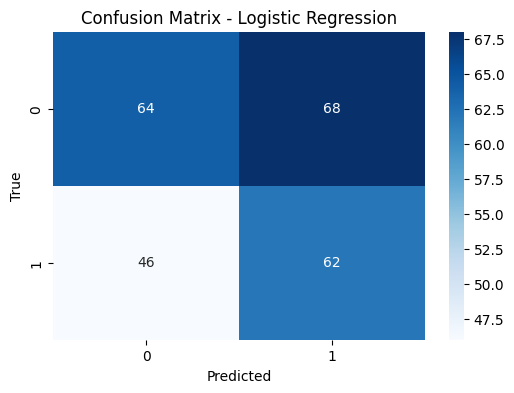

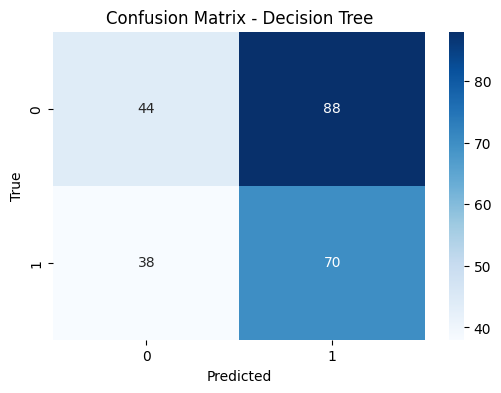

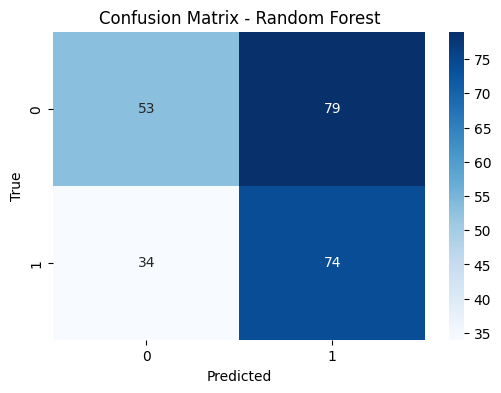

In [ ]:
# Train and evaluate models
results = {}
for name, (model, param_dist) in models.items():
    pipeline = Pipeline([('preprocessor', preprocessor), ('classifier', model)])
    search = RandomizedSearchCV(
        pipeline,
        param_distributions=param_dist,
        n_iter=20,
        scoring='precision',
        cv=5,
        random_state=42,
        n_jobs=-1
    )
    search.fit(X_train, y_train)
    
    # Evaluating
    y_pred = search.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        'best_params': search.best_params_,
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1-score': report['1']['f1-score'],
        'accuracy': report['accuracy']
    }
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


In [82]:
#results
results_df = pd.DataFrame(results).T
print("Model Comparison:")
print(results_df[['precision', 'recall', 'f1-score', 'accuracy']])


Model Comparison:
                    precision    recall  f1-score  accuracy
Logistic Regression  0.476923  0.574074  0.521008     0.525
Decision Tree        0.443038  0.648148  0.526316     0.475
Random Forest         0.48366  0.685185   0.56705  0.529167
